# 1) Delivery_time -> Predict delivery time using sorting time 

In [17]:
#  Loading the libraries
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf



In [2]:
# Loading csv file into dataframe via panda
df=pd.read_csv('E://EXCELR//Data science//Data science assignment//4) Simple Regression//delivery_time.csv')
df


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},inplace=True)
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Checking the distribution and detecting outliers

<AxesSubplot:>

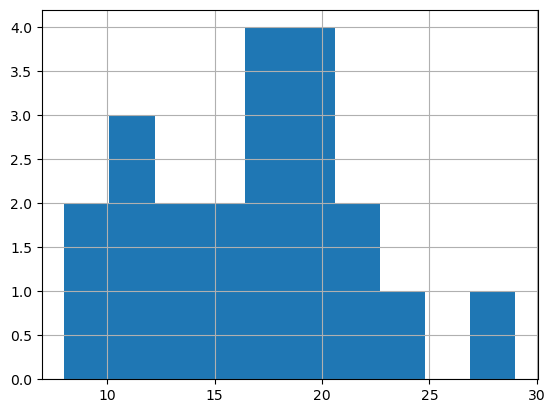

In [6]:
df['Delivery_Time'].hist()

C:\Users\91771\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91771\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


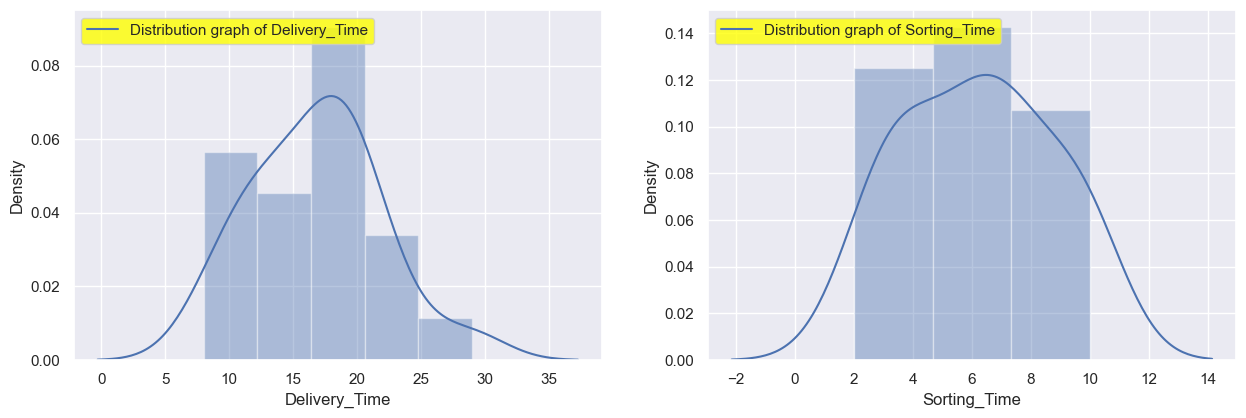

In [7]:
# visualing distribution of both delivery and sorting time
sns.set(rc={'figure.figsize':(15,10)})
# create first plot
plt.subplot(2,2,1)
ax=sns.distplot(df['Delivery_Time'])
plt.legend(['Distribution graph of Delivery_Time'],loc='upper left',facecolor='yellow')

# creating the second plot
plt.subplot(2,2,2)
ax=sns.distplot(df['Sorting_Time'])
plt.legend(['Distribution graph of Sorting_Time'],loc='upper left',facecolor='yellow')


plt.show()

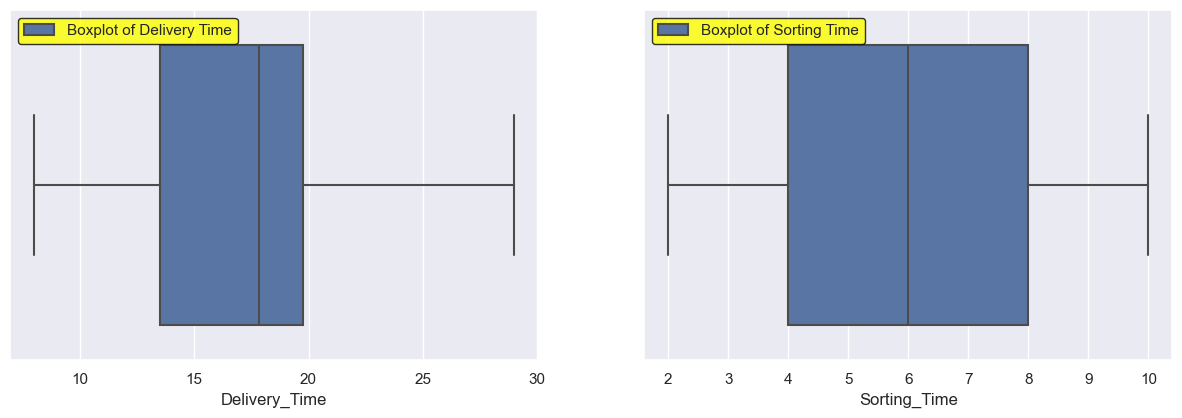

No outliers present in both data


In [8]:
# Using boxplot to detect oytliers
sns.set(rc={'figure.figsize':(15,10)})
# creating first plot
plt.subplot(2,2,1)
ax=sns.boxplot(x=df['Delivery_Time'])
plt.legend(['Boxplot of Delivery Time'],loc='upper left',facecolor='yellow',edgecolor='black')

# creating the subplot
plt.subplot(2,2,2)
ax=sns.boxplot(x=df['Sorting_Time'])
plt.legend(['Boxplot of Sorting Time'],loc='upper left',facecolor='yellow',edgecolor='black')

plt.show()

print('No outliers present in both data')

# Checking correlation between input and output variable using scatter plot and correlation matrix


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

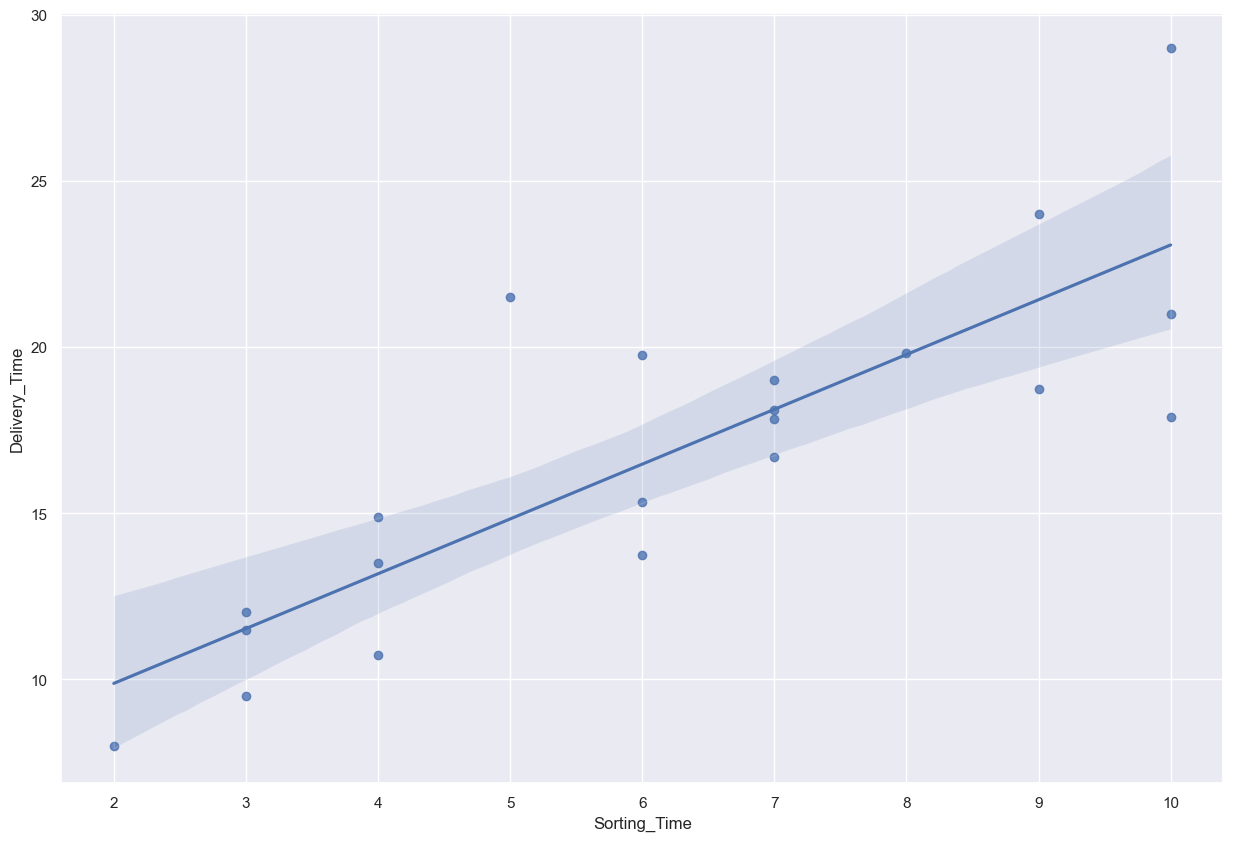

In [9]:
# using a scatter plot
sns.regplot(x='Sorting_Time', y='Delivery_Time', data=df)

In [10]:
# using correlation matrix
df.corr()

print('We can see the correlation coeff is 0.82 which suggest a high positive correlation')

We can see the correlation coeff is 0.82 which suggest a high positive correlation


# Model1= Using raw data without standardization and transformation

In [11]:
model1=smf.ols('Delivery_Time ~ Sorting_Time',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        19:51:42   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# calculating the RMSE of model 1
pred_data=model1.predict(df['Sorting_Time'])
from sklearn.metrics import mean_squared_error
mse = mean_squared_error
rmse_1=np.sqrt(mse(df['Delivery_Time'],pred_data))
print('RMSE value = ',rmse_1)

# Note: If ml_metrics lib not import we can use 
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error  as a replacement

RMSE value =  2.7916503270617654


# Model 2- Using Standardization on input and output variable

In [24]:
# Converting thre dataframe into an array 
from sklearn.preprocessing import StandardScaler
array_df=df.values
standard_df=StandardScaler().fit(array_df).transform(array_df)
standard_df[0:5]

array([[ 0.84986692,  1.53562462],
       [-0.66449036, -0.88298415],
       [ 0.59747404, -0.07678123],
       [ 1.45560983,  1.13252315],
       [ 2.46518134,  1.53562462]])

In [25]:
# seperating the array into X and Y
import statsmodels.api as sm
X=standard_df[:,1]
Y=standard_df[:,0]
model_2=sm.OLS(Y,X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                              42.95
Date:                Tue, 16 Jan 2024   Prob (F-statistic):                    2.19e-06
Time:                        20:12:02   Log-Likelihood:                         -17.759
No. Observations:                  21   AIC:                                      37.52
Df Residuals:                      20   BIC:                                      38.56
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8260      0.126      6.553      0.000       0.563       1.089
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Calculating RMSE for model-2
pred_2=model_2.predict(X)
rmse_2=np.sqrt(mse(Y,pred_2))
print('RMSE value = ',rmse_2)

RMSE value =  0.563674130290079


# Model 3- Using transformation on y

In [28]:
df2=df.copy()
df2['log_Deliverytime']=np.log(df2['Delivery_Time'])
df2.head()

,Delivery_Time,Sorting_Time,log_Deliverytime
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296


In [29]:
# cheking correlation between tranformed output and variable input 
df2['Sorting_Time'].corr(df2['log_Deliverytime'])

0.8431772637224149

In [30]:
model_3=smf.ols('log_Deliverytime~Sorting_Time',data=df2).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_Deliverytime   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           1.59e-06
Time:                        20:22:10   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Calculating RMSE for model-3
pred_3=model_3.predict(df2['Sorting_Time'])
rmse_3=np.sqrt(mse(df2['log_Deliverytime'],pred_3))
print('RMSE value = ',rmse_3)

RMSE value =  0.16696276106302863


# model 4 - Using norm on x and y

In [31]:
# Normalizatin the dataset
from sklearn.preprocessing import MinMaxScaler
array_df=df.values
norm_df=MinMaxScaler().fit(array_df).transform(array_df)
norm_df[0:5]

array([[0.61904762, 1.        ],
       [0.26190476, 0.25      ],
       [0.55952381, 0.5       ],
       [0.76190476, 0.875     ],
       [1.        , 1.        ]])

In [33]:
# spliting x and y
X=norm_df[:,1]
Y=norm_df[:,0]
model_4=sm.OLS(Y,X).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              213.7
Date:                Tue, 16 Jan 2024   Prob (F-statistic):                    3.86e-12
Time:                        20:25:38   Log-Likelihood:                          11.409
No. Observations:                  21   AIC:                                     -20.82
Df Residuals:                      20   BIC:                                     -19.77
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7548      0.052     14.620      0.000       0.647       0.863
==============================================================================
Omnibus:                        1.543   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                0.423
Skew:                           0.259   Prob(JB):                        0.809
Kurtosis:                       3.465   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Calculating RMSE for model-4
pred_4=model_4.predict(X)
rmse_4=np.sqrt(mse(Y,pred_4))
print('RMSE value = ',rmse_4)

RMSE value =  0.14054714818280667
ERROR! Session/line number was not unique in database. History logging moved to new session 114


In [39]:
result_df=pd.DataFrame({'Models':['Raw data','Standardization','transformation on y','Normalization'],'R values':[0.682,0.682,0.711,0.914],'RMSE':[rmse_1,rmse_2,rmse_3,rmse_4]})
result_df


,Models,R values,RMSE
0,Raw data,0.682,2.791650
1,Standardization,0.682,0.563674
2,transformation on y,0.711,0.166963
3,Normalization,0.914,0.140547


# Model 4 (normalization) is the best model with highest R-squared value of 0.914 and RMSE of 0.14



# Note: R-squared value is close to 1 and RMSE value should be close to 0 or lower